# K-Means Application : Image Segmentation


### Import the necessary libraries

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

### Read the image file and convert it to NumPy Array

In [2]:
def ReadImage(img_file):
    img_arr = mpimg.imread(img_file) # converting img to array
    plt.imshow(img_arr)
    return(img_arr)

(553, 830, 3)
(553, 830)


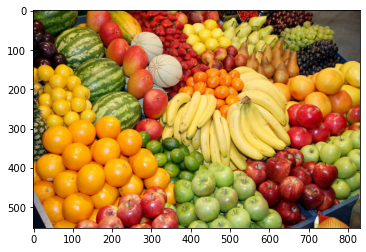

In [3]:
image_arr = ReadImage("./fruits.jpg")
print(image_arr.shape)
label_arr = np.zeros((image_arr.shape[0],image_arr.shape[1]))
print(label_arr.shape)

###  Assign random labels to individual pixels 

In [4]:
K =10  ## K is the number of clusters that we want to create 

for i in range(label_arr.shape[0]):
    for j in range(label_arr.shape[1]):
        label_arr[i,j] = np.random.choice(K)
print(label_arr)

[[1. 7. 1. ... 7. 5. 4.]
 [0. 8. 5. ... 9. 8. 0.]
 [0. 5. 7. ... 3. 9. 3.]
 ...
 [8. 4. 8. ... 9. 2. 4.]
 [1. 0. 8. ... 4. 9. 1.]
 [8. 3. 1. ... 6. 7. 0.]]


In [5]:
# if p = 2 = euclidian distance
#     p = 1 = norm, chebyshev distance

In [6]:
def dist_p(vec1,vec2,p):  # Generalised Distance Formula
    L = len(vec1)
    s1 = 0
    for l in range(L):
        diff = np.abs(vec2[l]-vec1[l])
        s1 = s1 + diff**p
    distance = s1**(1/p)
    return(distance)

### Define function to generate the initial mean values from initial labels

In [7]:
def init_mean(K,img_arr,label_arr):
    mean_ls = [] ## List containing mean values of the clusters
    pixel_ls = [[] for k in range(K)] ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):  # no of rows
        for j in range(label_arr.shape[1]):
            for k in range(K): # no of clusters
                if label_arr[i,j] == k:  ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K): 
        pixel_mat = np.matrix(pixel_ls[k])
        mean_k = np.mean(pixel_mat,axis=0)
        mean_ls.append(np.ravel(mean_k))
    return(mean_ls)    

### Update labels by comparing distances with previous mean values and generate new labels

In [8]:
def label_update(prev_mean,img_arr,label_arr,p):
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            dist_ls = [] 
            for k in range(len(prev_mean)):
                dist = dist_p(img_arr[i,j,:],prev_mean[k],p) ## Calculate the distance of the pixel at [i,j] with the kth mean
                dist_ls.append(dist) ## Put the distance values in a list
            dist_arr = np.array(dist_ls) ## Convert it to a NumPy array
            new_label = np.argmin(dist_arr) ##The new_label of the point is the one which is closest to the pixel at [i,j]
            label_arr[i,j] = new_label ## Set the new label
    return(label_arr)

### Generate new mean values from the updated labels

In [9]:
def mean_from_label(K,prev_mean,img_arr,label_arr):
    pixel_ls = [[] for k in range(K)]  ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k: ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K):
        if len(pixel_ls[k]) != 0:  ## Only update the means of those clusters which has received at least one new point, else retain the old mean value
            pixel_mat = np.matrix(pixel_ls[k])
            mean_k = np.mean(pixel_mat,axis=0)
            prev_mean[k] = np.ravel(mean_k)
    new_mean = prev_mean
    return(new_mean)    

### Run the K-Means Algorithm and obtain the final labels and means

In [10]:
def KMeans(img_arr,label_arr,K,p,maxIter):
    mean_old = init_mean(K,img_arr,label_arr)
    for t in range(maxIter):
        new_label_arr = label_update(mean_old,img_arr,label_arr,p)
        mean_new = mean_from_label(K,mean_old,img_arr,new_label_arr)
        print("The mean obtained at {}th iteration is {}\n".format(t,mean_new))
        label_arr = new_label_arr ## Update the label array
        mean_old = mean_new ## Update the mean values
    return(mean_new,label_arr)

In [11]:
mean_new,label_arr = KMeans(image_arr,label_arr,K,2,3)

The mean obtained at 0th iteration is [array([109.72515614,  61.04289948,  29.3957527 ]), array([211.83343539,  64.18677281,  53.78934476]), array([155.29223344, 156.13251426,  27.24265029]), array([198.61375661, 105.98677249, 100.28835979]), array([158.62471849, 161.69436293,  96.41104211]), array([141.2295082 , 154.29806259,  46.49031297]), array([146.54166667, 157.33333333,  43.41666667]), array([213.77389405,  70.48388859,  61.40524304]), array([206.54468409, 104.99206823,   9.72401804]), array([229.00484458, 175.59362997,  67.43765909])]

The mean obtained at 1th iteration is [array([81.20378247, 46.04281229, 25.11144024]), array([192.75115487,  46.30282901,  36.70823077]), array([165.01326285, 146.91907737,  23.82335416]), array([210.19297972, 116.75046802,  94.29960998]), array([175.09771534, 177.90686357, 114.11042121]), array([123.29850746, 137.01512073,  49.65870907]), array([162.23409031, 165.22841299,  53.3926591 ]), array([216.90608754,  84.77771256,  64.4692269 ]), array(

### Use the finally obtained mean and labels to segment the image

every mean vector represents the group of pixcel,
replacing pixcel values with the coreesponding updated mean value 

In [12]:
def segmentImage(image_arr,label_arr,mean_ls):
    seg_image = np.zeros((image_arr.shape[0],image_arr.shape[1],image_arr.shape[2])) # create list of size same as image
    for i in range(seg_image.shape[0]):
        for j in range(seg_image.shape[1]):
            k = label_arr[i,j]
            seg_image[i,j,:] = mean_ls[int(k)]
    seg_image = seg_image.astype(np.uint8) # convert to unsigned no
    plt.imshow(seg_image)

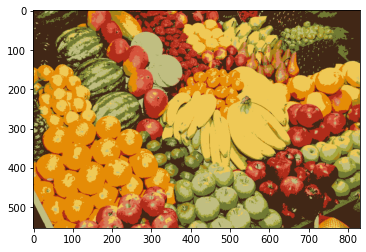

In [13]:
segmentImage(image_arr,label_arr,mean_new)